## Problem Statement

##### The goal is to predict whether the customer will purchase the travel or not.

## Data_Set Details

##### CustomerID:-It is the Unique Id given to the Customer
##### ProdTaken: Customer has purchased the package or not
##### TypeOfContact :- How we approached to the customer
##### CityTier: To which city category the customer belongs
##### NumberofPersonVisiting :- How many persons visiting for the travel
##### Occupation :- Occupation of the Customer
##### DurationOfPitch:- Duration of the travel
##### ProductPitched:- Which travel package customer has opted for
##### PreferredPropertyStar: Preferred hotel property rating by customer
##### MonthlyIncome:- total income of the customer
##### PitchSatisfactionScore: Sales pitch satisfaction score
##### NumberofFollowUps: How many followups were done by sales person before the finalizing the product

### Other details are:
##### Designation, OwnCar, Passport, NumberofTrips, MartialStatus, Age, Gender, 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("data/tour_package.csv")

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Handling Missing Values

In [6]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
# Placing the int & float datatypes to form a numerical feature group
num_features= data.select_dtypes(include=['int','float']).columns

In [10]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [11]:
## replacing the null values with mean in numerical columns
for i in num_features:
    mean_value=data[i].mean()
    data[i].fillna(mean_value,inplace=True)
    

In [12]:
## After replacing the null values in numerical columns we got
data.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [13]:
cat_columns=data.select_dtypes(include='object').columns
cat_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [14]:
# replacing null values in categorical columns with mode(iloc : to get the first mode value if multiple are present)
for x in cat_columns:
    mode_value=data[x].mode().iloc[0]
    data[x].fillna(mode_value,inplace=True)

In [15]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Handling Outliers

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.490835,8.297971,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.708445,0.997882,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.581037,0.795883,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.236521,1.822342,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<Axes: >

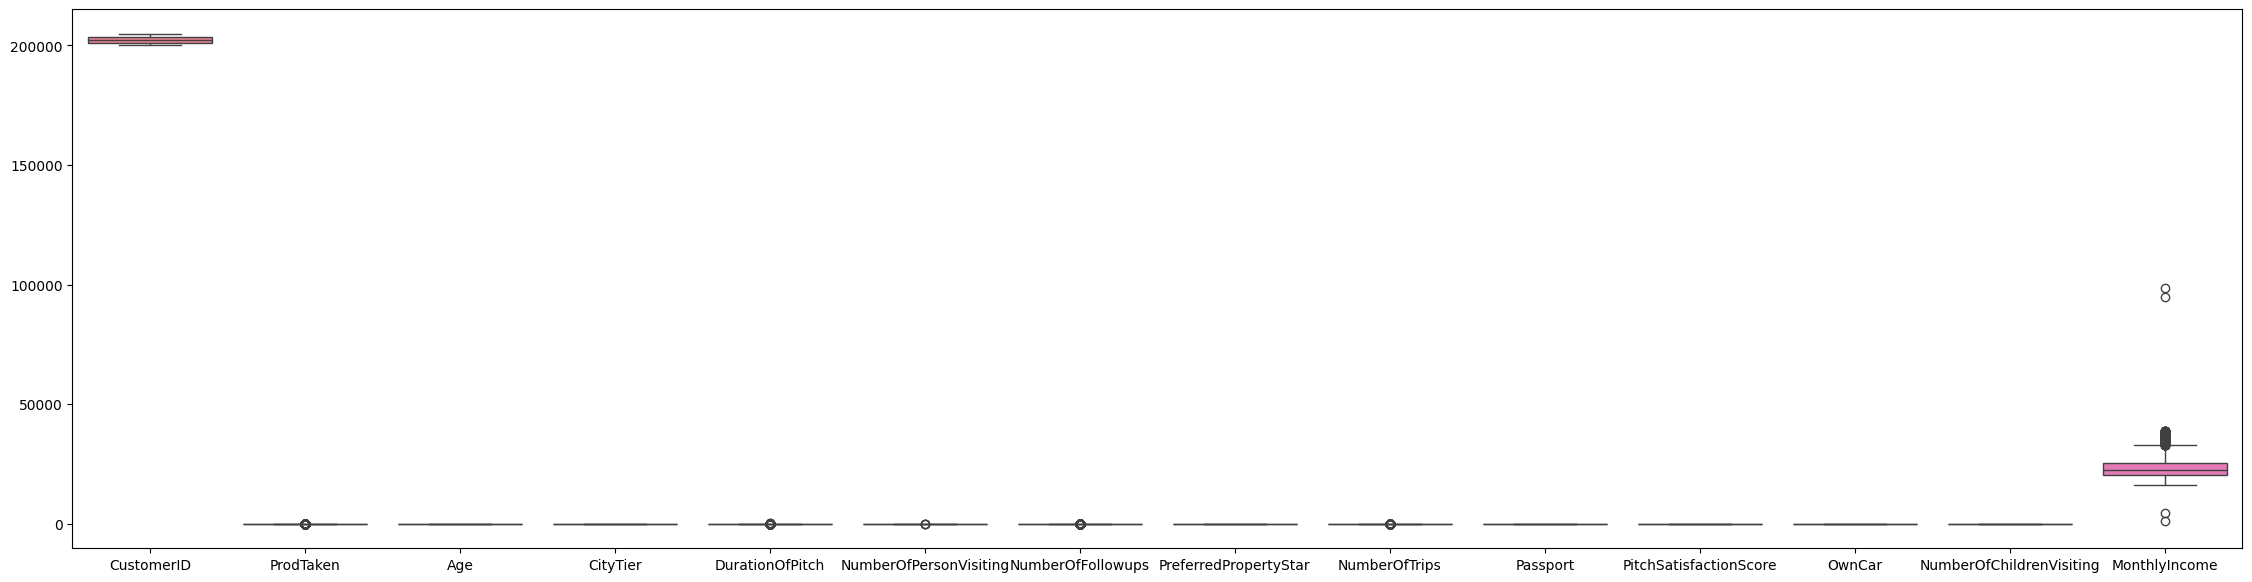

In [17]:
plt.figure(figsize=(28,7))
sns.boxplot(data=data,)

<Axes: ylabel='MonthlyIncome'>

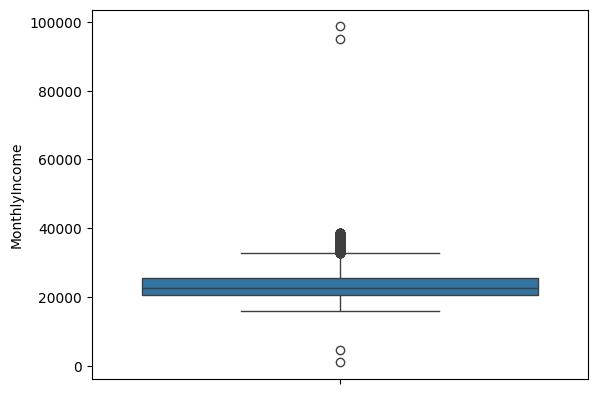

In [18]:
# As we can see there are outliers only in MonthlyIncome, So we need to remove them
sns.boxplot(data=data['MonthlyIncome'])

In [19]:
#column_name='MonthlyIncome'
def remove_outlier(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3 + 1.5*IQR
    
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    
    return data

In [20]:
data=remove_outlier(data,'MonthlyIncome')

<Axes: ylabel='MonthlyIncome'>

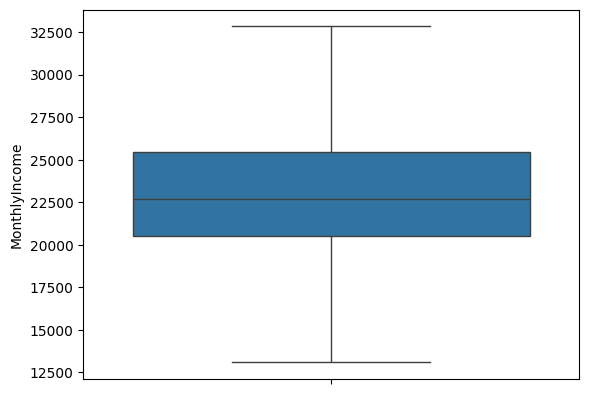

In [21]:
sns.boxplot(data=data['MonthlyIncome'])

# Insights

#### 1) The Data contains features of different  data types like int, floiat , object
####  2) The Data had many missing values & I replaced them with their mean & mode
####   3) There was some oultliers in the "MonthlyIncome" column

In [22]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Analysis

### Our Target variable would be "ProdTaken"

In [23]:
for i in cat_columns:
    print(f"categorical_columns:{i}")
    print(data[i].value_counts())
    print(" ")

categorical_columns:TypeofContact
TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
 
categorical_columns:Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
 
categorical_columns:Gender
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
 
categorical_columns:ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
 
categorical_columns:MaritalStatus
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
 
categorical_columns:Designation
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
 


In [24]:
 data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

In [25]:
 data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])

In [26]:
for i in cat_columns:
    print(f"categorical_columns:{i}")
    print(data[i].value_counts())
    print(" ")

categorical_columns:TypeofContact
TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
 
categorical_columns:Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
 
categorical_columns:Gender
Gender
Male      2916
Female    1972
Name: count, dtype: int64
 
categorical_columns:ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
 
categorical_columns:MaritalStatus
MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
 
categorical_columns:Designation
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
 


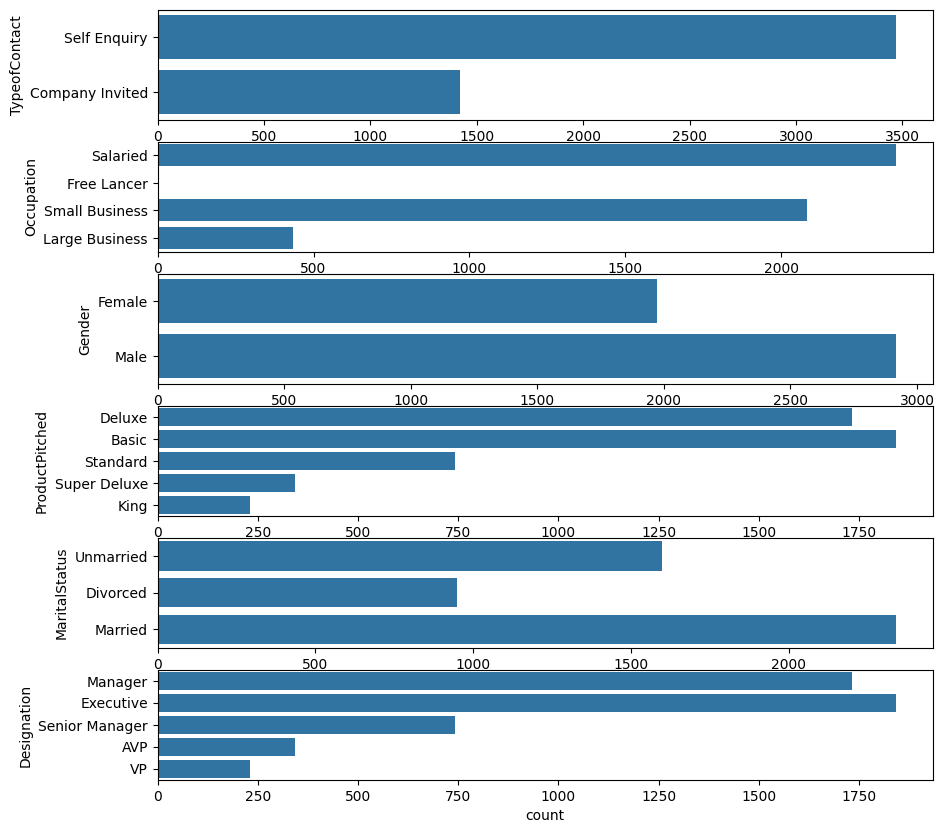

In [27]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_columns)):
    sns.countplot(y=data[cat_columns[i]],ax=ax[i])

# Insights

### 1. The Self Enquiry has choosen by the most of the Customers
### 2. Salaried and Small Business Customers are the most.
### 3.  Most Customers opted for 'Basic' followed by 'Deluxe' while 'King' is less chosen package
### 4.  Most of the Customers are married
### 5.  'Executive' Designation are most customers followed by 'Managers' while 'VP' are less

In [28]:
len(cat_columns)

6

In [29]:
for i in range(len(cat_columns)):
    print(data.groupby([cat_columns[i],'ProdTaken']).size())
    print(" ")

TypeofContact    ProdTaken
Company Invited  0            1109
                 1             310
Self Enquiry     0            2859
                 1             610
dtype: int64
 
Occupation      ProdTaken
Free Lancer     1               2
Large Business  0             314
                1             120
Salaried        0            1954
                1             414
Small Business  0            1700
                1             384
dtype: int64
 
Gender  ProdTaken
Female  0            1630
        1             342
Male    0            2338
        1             578
dtype: int64
 
ProductPitched  ProdTaken
Basic           0            1290
                1             552
Deluxe          0            1528
                1             204
King            0             210
                1              20
Standard        0             618
                1             124
Super Deluxe    0             322
                1              20
dtype: int64
 
MaritalStatus  ProdTa

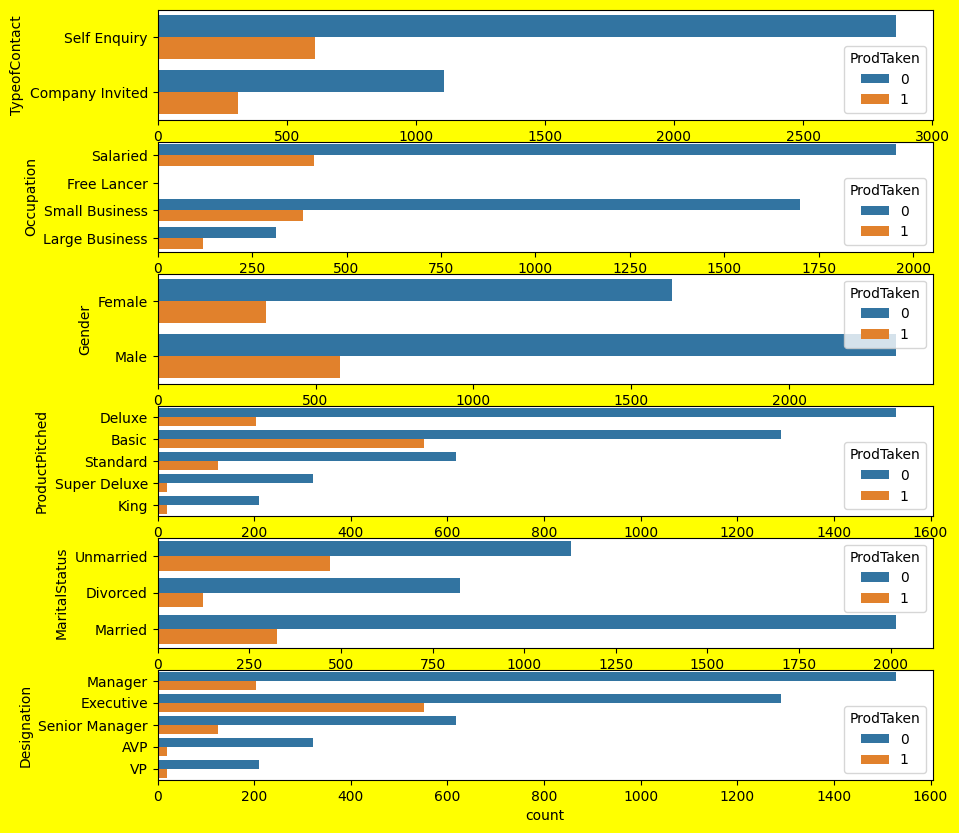

In [30]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='yellow', edgecolor='k')
for i in range(len(cat_columns)):
    sns.countplot(y=data[cat_columns[i]],ax=ax[i],hue=data["ProdTaken"])

# Insights

### 1. Male Customers purchased more compared to female.
### 2. Salaried and Small Business Customers are the most who purchased the product.
### 3.  'Basic' package has been booked by most customers while 'King' is less chosen package
### 4.  Mostly Unmarried customers took the product compared to other counterparts
### 5. Executive purchase more than any counterparts 

In [31]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Let's deep dive into numerical columns now as it also contains some cat_columns but with int or float dtype


In [32]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [33]:
data["Age"].describe().T

count    4888.000000
mean       37.622265
std         9.098418
min        18.000000
25%        31.000000
50%        37.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

<Axes: xlabel='count', ylabel='Age'>

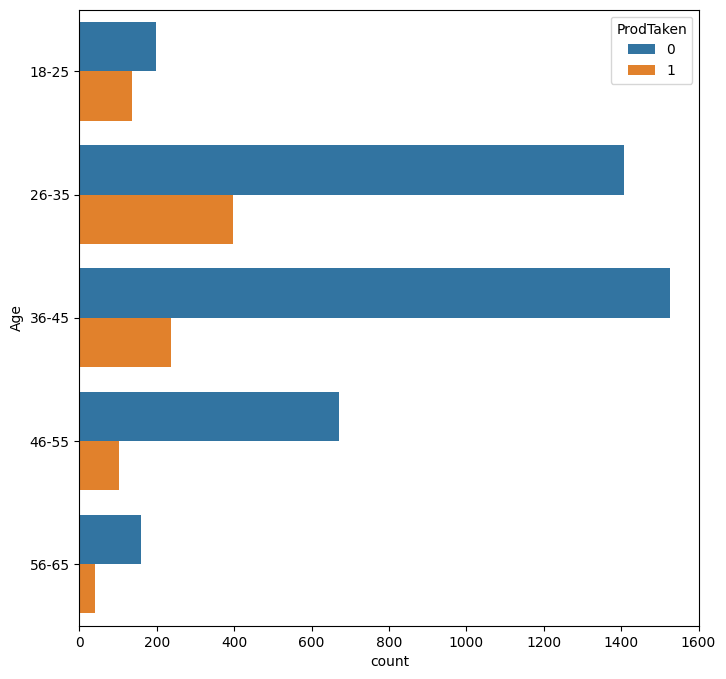

In [34]:
plt.figure(figsize=(8,8))
data['Age'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65,],labels=["18-25","26-35","36-45","46-55","56-65"])
sns.countplot(y=data["Age"],hue=data['ProdTaken'])

In [35]:
data["Age"]

0       36-45
1       46-55
2       36-45
3       26-35
4       36-45
        ...  
4883    46-55
4884    26-35
4885    46-55
4886    18-25
4887    36-45
Name: Age, Length: 4888, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65']

## Insights

#### 1. AgeGroup between 26 to 35 have pitched the product most while 56-65 have less

In [36]:
data['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.000000    2993
5.000000     956
4.000000     913
3.581037      26
Name: count, dtype: int64

In [37]:
data["CityTier"]

0       3
1       1
2       1
3       1
4       1
       ..
4883    3
4884    1
4885    3
4886    3
4887    1
Name: CityTier, Length: 4888, dtype: int64

In [38]:
print(len(data["CityTier"]))
total=len(data['CityTier'])
purchase=len(data[data["ProdTaken"]==1]["CityTier"])
print(purchase)
purchase_rate=(purchase/total)*100
print(f"{purchase_rate}%")

4888
920
18.821603927986907%


In [39]:
total=len(data['CityTier'])
no_purchase=len(data[data["ProdTaken"]==0]["CityTier"])
print(no_purchase)
no_purchase_rate=(no_purchase/total)*100
print(f"{no_purchase_rate}%")

3968
81.17839607201309%


<Axes: xlabel='count', ylabel='CityTier'>

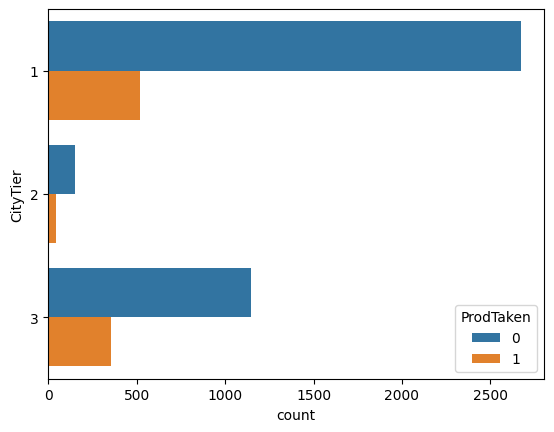

In [40]:
sns.countplot(y=data["CityTier"],hue=data['ProdTaken'])

### 1. Most Customers are from Tier 1 & Tier 3 which had opted for the Product While Tier 2 has the least Customers

In [41]:
df=data.copy()

In [42]:
df=df.drop("CustomerID",axis=1)

In [43]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,36-45,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,46-55,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,36-45,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,26-35,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36-45,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [44]:
df['DurationOfPitch'].describe()

count    4888.000000
mean       15.490835
std         8.297971
min         5.000000
25%         9.000000
50%        14.000000
75%        19.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

In [45]:
df['DurationOfPitch'].value_counts()

DurationOfPitch
9.000000      483
7.000000      342
8.000000      333
6.000000      307
16.000000     274
15.000000     269
14.000000     253
15.490835     251
10.000000     244
13.000000     223
11.000000     205
12.000000     195
17.000000     172
30.000000      95
22.000000      89
31.000000      83
23.000000      79
18.000000      75
29.000000      74
32.000000      74
25.000000      73
21.000000      73
27.000000      72
26.000000      72
24.000000      70
35.000000      66
20.000000      65
28.000000      61
33.000000      57
19.000000      57
34.000000      50
36.000000      44
5.000000        6
126.000000      1
127.000000      1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='DurationOfPitch'>

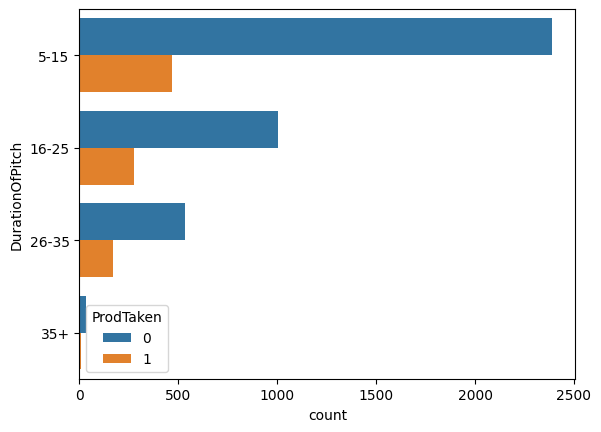

In [46]:
df['DurationOfPitch'] = pd.cut(df['DurationOfPitch'], bins=[5, 15, 25, 35,45,],labels=["5-15","16-25","26-35","35+"])
sns.countplot(y=df["DurationOfPitch"],hue=df['ProdTaken'])

### Duration of most pitches are from 5 to 15 days while 35+ stay is very least

In [47]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [48]:
num_features= df.select_dtypes(include=['int','float']).columns

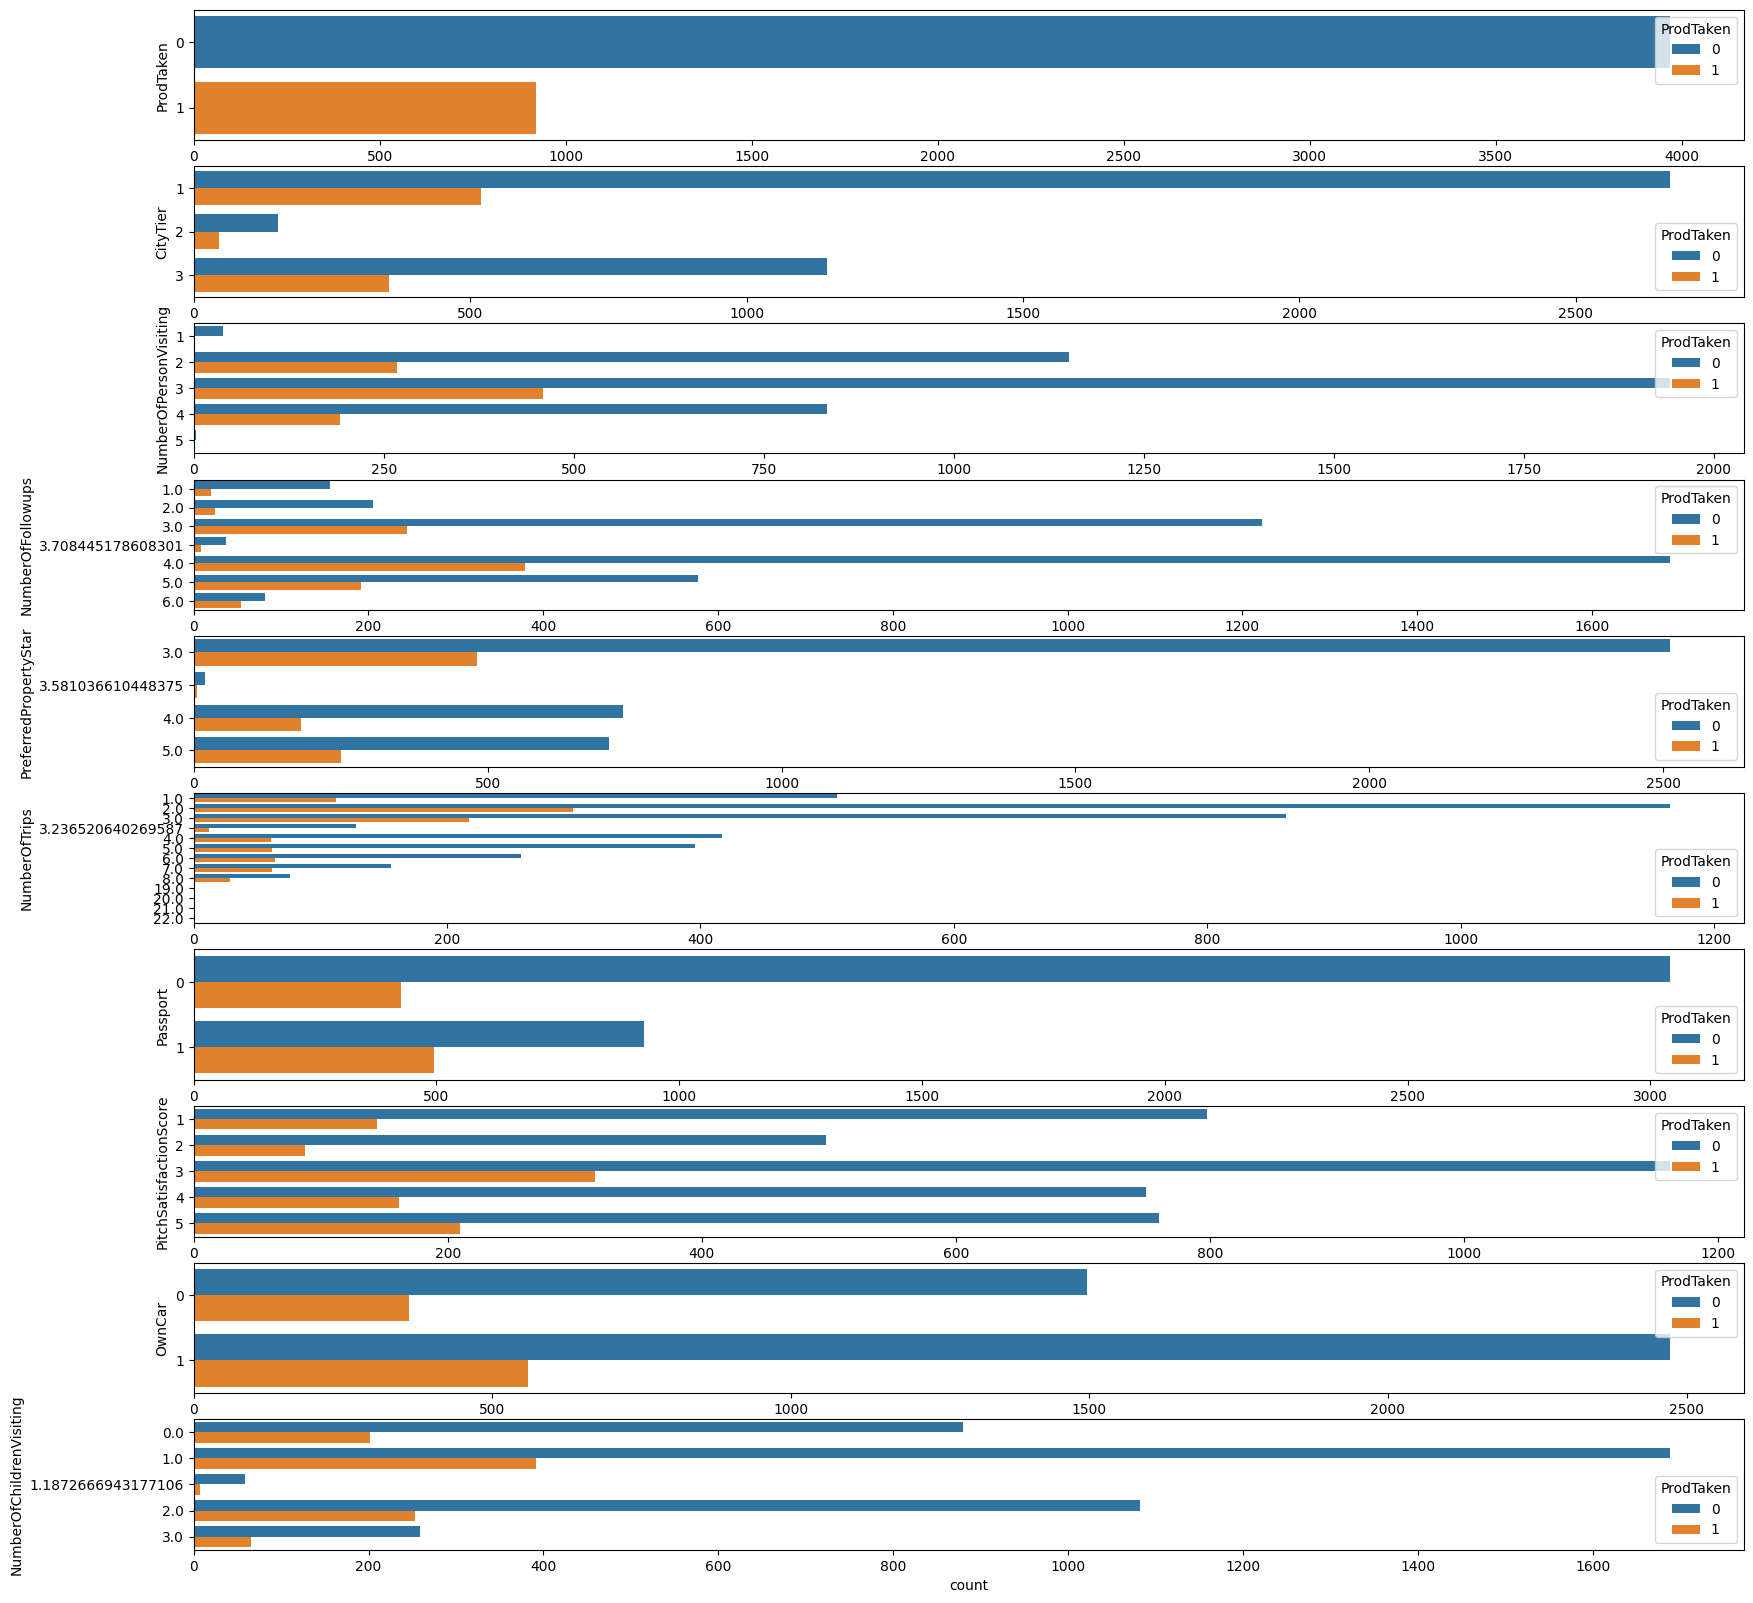

In [ ]:
from matplotlib.ticker import FuncFormatter
fig,ax=plt.subplots(10,figsize=(20,20))
for i in range(len(num_features)):
    if num_features[i]!="MonthlyIncome":
        sns.countplot(y=df[num_features[i]],ax=ax[i],hue=df["ProdTaken"])
        


## Insights

#### 1. Most Customers are from Tier 1 & 3 Opted for the product While Tier 2 got very less
#### 2. Most Number of people visiting are 2 followed by 3 people 5 &1 are very very less
#### 3. Number of follows done by the SalesPerson to pitch the Product is 4
#### 4. Customers who opted for the product. Most have choosen the Rating of Property 3 stars
#### 5. Most Customers have Number of trips 2
#### 6. Customers who have passport has purchased the most.
#### 7. The Customers with the cars has choosen the product most
#### 8. Customers with 1 children had choosen the product compared with their counterparts 

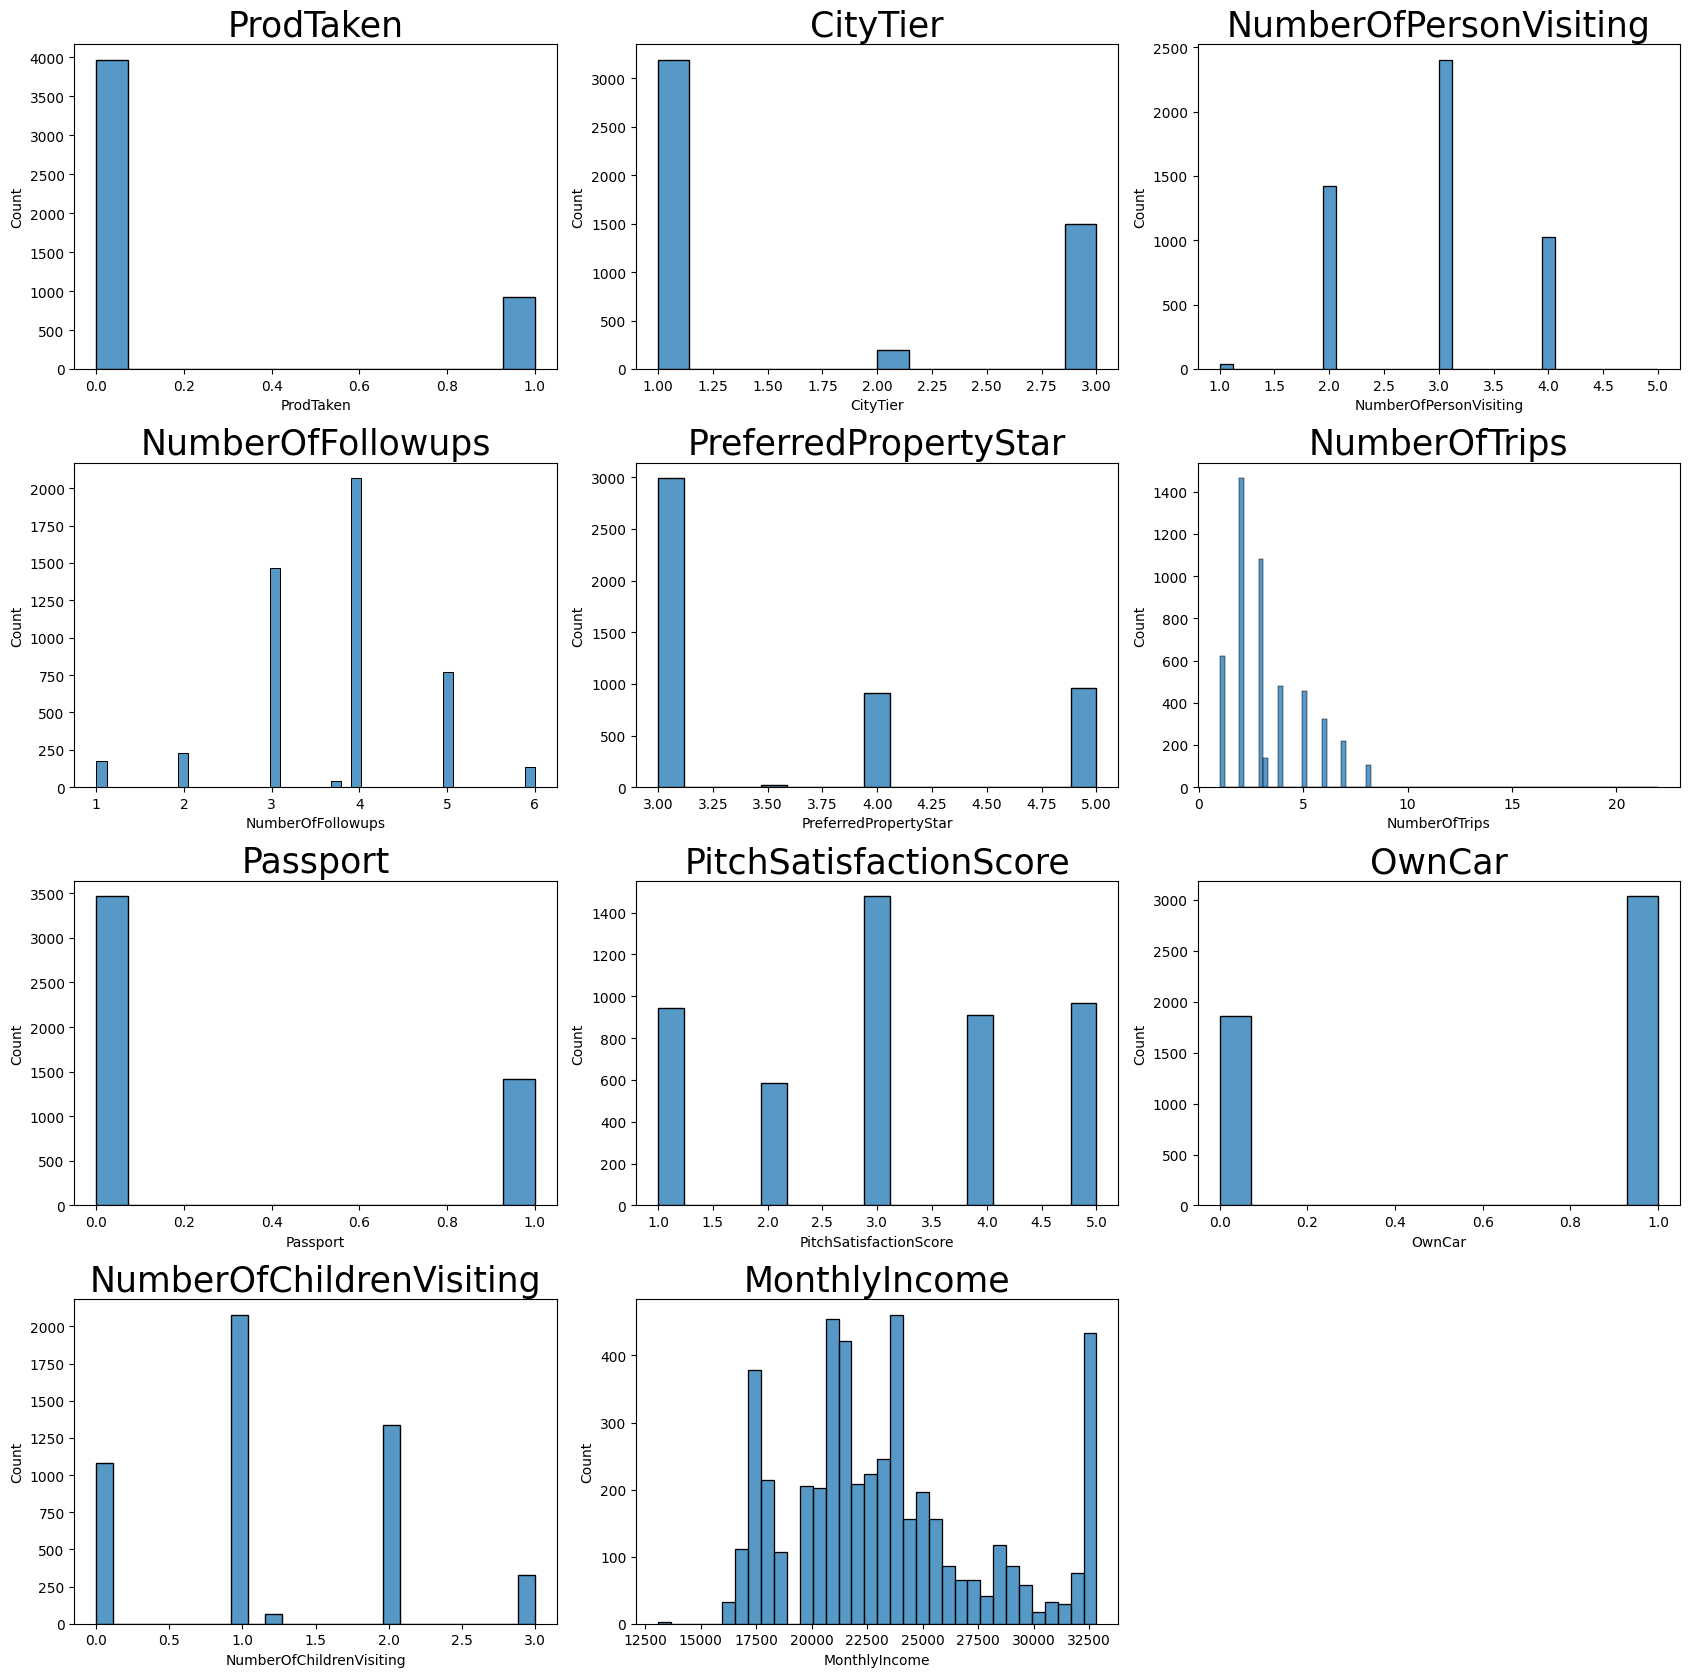

In [ ]:
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

#### 1. Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.
#### 2. DurationofPitch is slightly right-skewed. We see that most customer's pitch duration was under 20 mins. We also see few outliers at 40 mins and at 120+ mins.
##### 3. The highest number of followups is 4.0 followed by 3.0.
#### 4. NumberofTrips is right-skwed a little and majority of the customers seem to take atleast 3 trips per year. We also see very few outliers in the higher end
#### 5. MonthlyIncome is also right-skewd. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. We also see two outliers in the low end and on the highest end. There are several outliers after the approx 35K dollars income level.